 #  A Whale off the Port(folio)
 ---

 In this assignment, I use what I've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns

import datetime as dt
from pathlib import Path
from pandas import DataFrame
import matplotlib.pyplot as plt

%matplotlib inline

# Data Cleaning

In this section, I read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, I combined all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Reading the Whale Portfolio daily returns and cleaning the data:

In [74]:
# Reading Whale Returns
whale_returns_data = pd.read_csv('whale_returns.csv', index_col='Date', parse_dates=True, infer_datetime_format=True)
whale_returns_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Counting nulls
whale_returns_data.isnull().mean() * 100
whale_returns_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Dropping nulls
whale_returns_data = whale_returns_data.dropna()

In [5]:
# Validating no more missing values
whale_returns_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Reading the algorithmic daily returns and cleaning the data:

In [75]:
# Reading algorithmic returns
algo_returns_data = pd.read_csv('algo_returns.csv', index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_returns_data.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Counting nulls
algo_returns_data.isnull().mean() * 100
algo_returns_data.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Dropping nulls
algo_returns_data = algo_returns_data.dropna()

In [9]:
# Validating no more missing values
algo_returns_data.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Reading the S&P 500 historic closing prices and creating a new daily returns DataFrame from the data:

In [76]:
# Reading S&P 500 Closing Prices
sp500_history_data = pd.read_csv('sp500_history.csv', index_col='Date', parse_dates=True, infer_datetime_format=True)
sorted_sp500_history = sp500_history_data.sort_values("Date", ascending=False)
sorted_sp500_history.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [11]:
# Checking Data Types
sorted_sp500_history.dtypes

Close    object
dtype: object

In [12]:
# Cleaning identified numeric fields with $ symbol
sorted_sp500_history["Close"] = sorted_sp500_history["Close"].str.replace("$", "")
sorted_sp500_history["Close"]

Date
2019-04-23    2933.68
2019-04-22    2907.97
2019-04-18    2905.03
2019-04-17    2900.45
2019-04-16    2907.06
               ...   
2012-10-05    1460.93
2012-10-04    1461.40
2012-10-03    1450.99
2012-10-02    1445.75
2012-10-01    1444.49
Name: Close, Length: 1649, dtype: object

In [13]:
# Fix Data Type
sorted_sp500_history["Close"] = sorted_sp500_history["Close"].astype("float")

In [14]:
sorted_sp500_history.dtypes

Close    float64
dtype: object

In [15]:
# Calculating Daily Returns
sorted_sp500_history_returns = sorted_sp500_history.pct_change()
sorted_sp500_history_returns

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [16]:
# Dropping nulls
sorted_sp500_history_returns.isnull().mean() * 100
sorted_sp500_history_returns.isnull().sum()

Close    1
dtype: int64

In [17]:
sorted_sp500_history_returns = sorted_sp500_history_returns.dropna()

In [18]:
# Validate no more missing values
sorted_sp500_history_returns.isnull().sum()

Close    0
dtype: int64

In [19]:
# Rename `Close` Column to be 'S&P500'
df_sorted_sp500_history_returns = sorted_sp500_history_returns.rename(columns={'Close': 'S&P500'})
df_sorted_sp500_history_returns

,S&P500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


## Combine Whale, Algorithmic, and S&P 500 Returns

In [20]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
all_returns = pd.concat([whale_returns_data, algo_returns_data, df_sorted_sp500_history_returns ], axis="columns", join="inner")

In [22]:
all_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, I calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

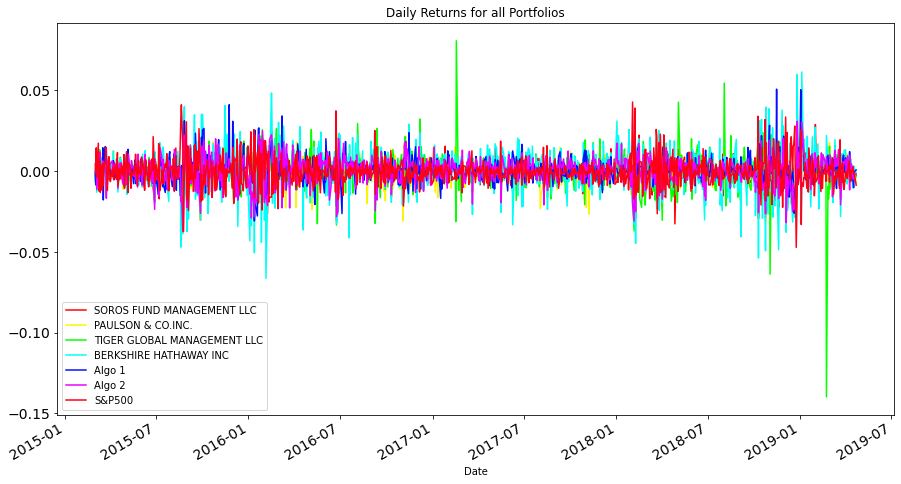

In [23]:
# Plot daily returns of all portfolios
all_returns.plot(figsize=(15,8), title="Daily Returns for all Portfolios", fontsize=14, colormap="hsv")

#### Calculate and Plot cumulative returns.

In [24]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + all_returns).cumprod()
cumulative_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,1.004408
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,1.003208
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,1.017632
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,1.013634
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,1.031123


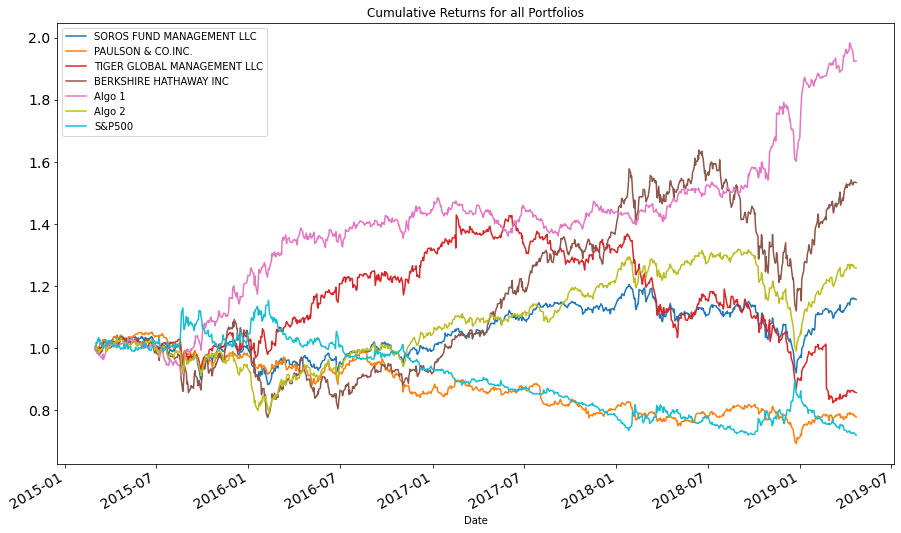

In [25]:
# Plot cumulative returns
cumulative_returns.plot(figsize=(15,9), title="Cumulative Returns for all Portfolios", fontsize=14, colormap="tab10")

---

## Risk Analysis

Determining the _risk_ of each portfolio by:

1. Creating a box plot for each portfolio. 
2. Calculating the standard deviation for all portfolios
4. Determining which portfolios are riskier than the S&P 500
5. Calculating the Annualized Standard Deviation

### Create a box plot for each portfolio


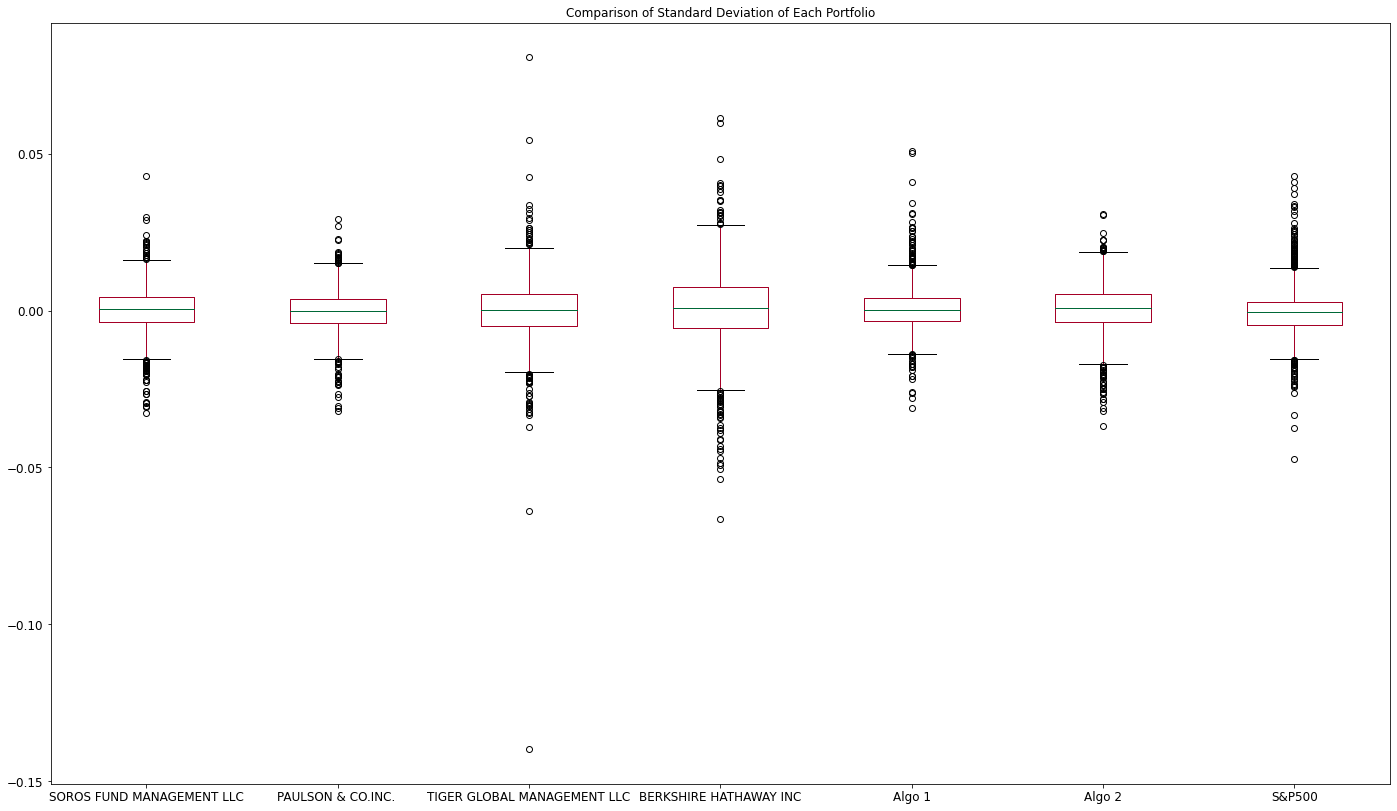

In [26]:
# Box plot to visually show risk/outliers
all_returns.plot.box(figsize=(24,14), fontsize=12,
                     title="Comparison of Standard Deviation of Each Portfolio",
                     colormap='RdYlGn')

### Calculate Standard Deviations

In [27]:
# Calculate the daily standard deviations of all portfolios
all_returns_daily_std = all_returns.std()
all_returns_daily_std

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P500                         0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [28]:
all_returns_daily_std = all_returns_daily_std.sort_values(ascending=False)
all_returns_daily_std

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
S&P500                         0.008587
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
Algo 1                         0.007623
PAULSON & CO.INC.              0.007026
dtype: float64

#### Berkshire Hathaway Inc. and Tiger Global Management LLC are more risky than S&P500.

### Calculate the Annualized Standard Deviation

In [29]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = all_returns_daily_std * np.sqrt(252)
annualized_std.head()

BERKSHIRE HATHAWAY INC         0.205079
TIGER GLOBAL MANAGEMENT LLC    0.172989
S&P500                         0.136313
Algo 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
dtype: float64

---

## Rolling Statistics

Risk changes over time. In this section, I analyzed the rolling statistics for Risk and Beta by:

1. Calculating and plotting the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculating the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choosing one portfolio, then calculating and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

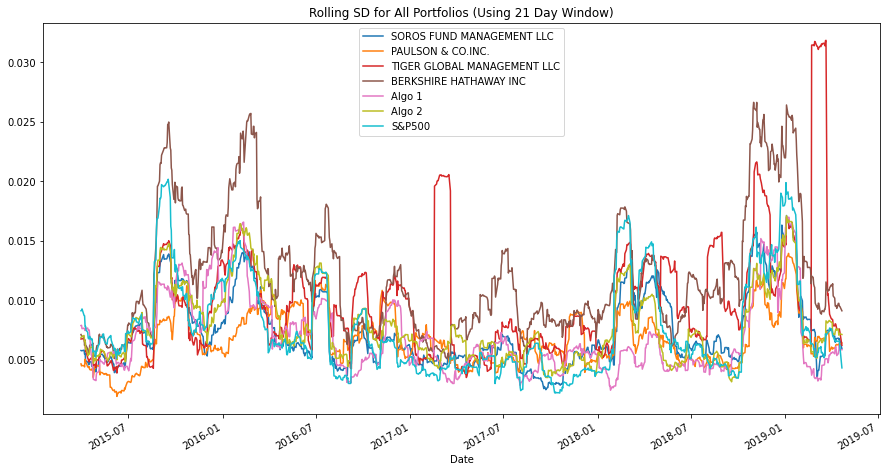

In [30]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
all_returns.rolling(window=21).std().plot(figsize=(15,8),
                                          title="Rolling SD for All Portfolios (Using 21 Day Window)", colormap="tab10")
# Plot the rolling standard deviation

### Calculate and plot the correlation

In [31]:
# Calculate the correlation
all_returns.corr()
# Display correlation matrix

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


In [32]:
mask = np.zeros_like(all_returns.corr()) 
triangle_indices = np.triu_indices_from(mask) 
mask[triangle_indices] = True
#mask 

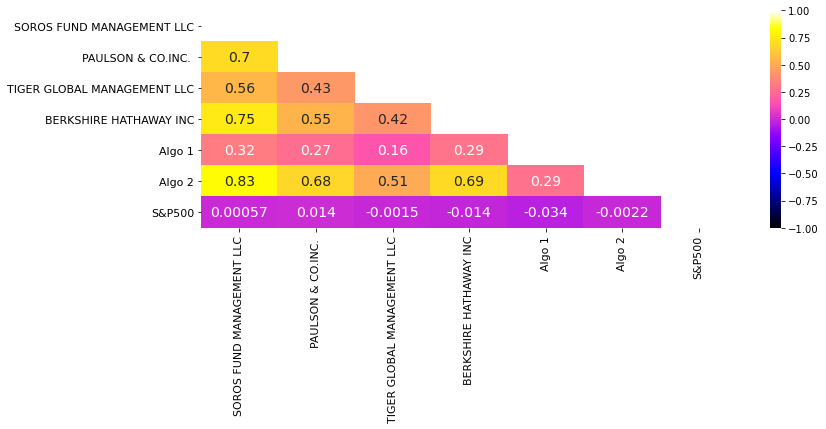

In [33]:
# Correlation Heatmap
plt.figure(figsize =(12,4))
sns.heatmap(all_returns.corr(), vmin=-1, vmax=1, mask=mask, annot=True, annot_kws={"size":14}, cmap='gnuplot2')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [34]:
# Choose one portfolio, then calculate and plot the 21-day rolling beta between it and the S&P 500
covariance = all_returns['BERKSHIRE HATHAWAY INC'].rolling(window = 60).cov(all_returns['S&P500'])

In [35]:
# Calculate variance of S&P 500
variance = all_returns['S&P500'].rolling(window=60).var()
variance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-15    0.000041
2019-04-16    0.000037
2019-04-17    0.000037
2019-04-18    0.000037
2019-04-22    0.000037
Name: S&P500, Length: 1042, dtype: float64

In [36]:
# Computing beta
sixty_day_rolling_beta = covariance / variance

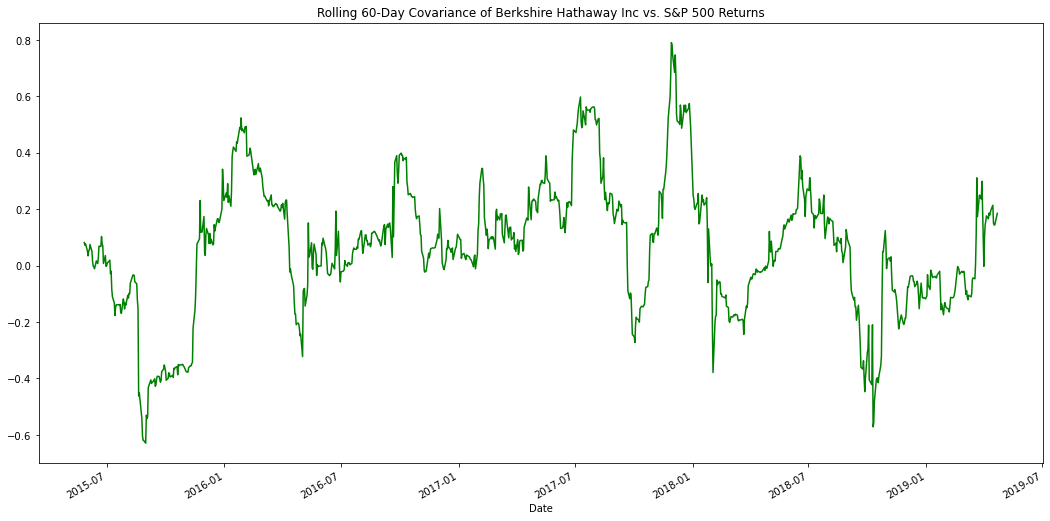

In [37]:
# Plot beta trend
sixty_day_rolling_beta.plot(figsize=(18, 9), title='Rolling 60-Day Covariance of Berkshire Hathaway Inc vs. S&P 500 Returns', color='green')

## Rolling Statistics: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. 

In this section, I calculated the exponentially weighted average [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [38]:
# Use `ewm` to calculate the rolling window
ewa = all_returns.ewm(halflife=21).mean()

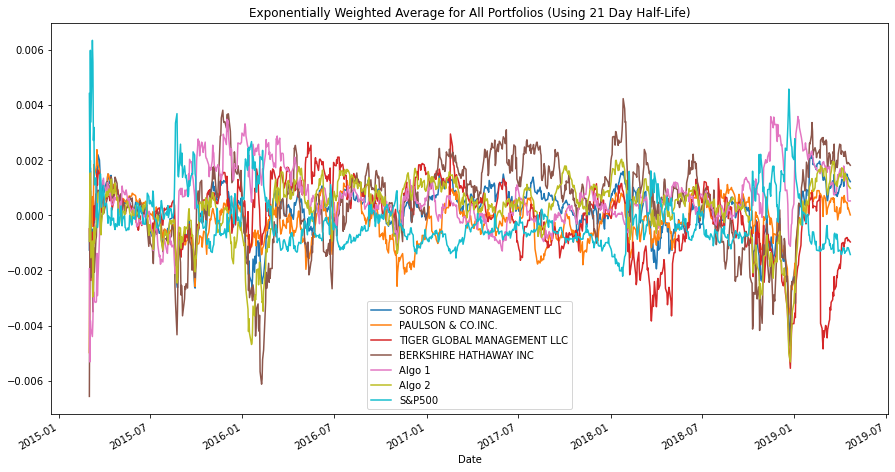

In [39]:
ewa.plot(figsize=(15,8), title="Exponentially Weighted Average for All Portfolios (Using 21 Day Half-Life)",
             colormap="tab10")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [40]:
# Calculating Sharpe Ratios
sharpe_ratios = (all_returns.mean() * 252) / (all_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P500                        -0.518582
dtype: float64

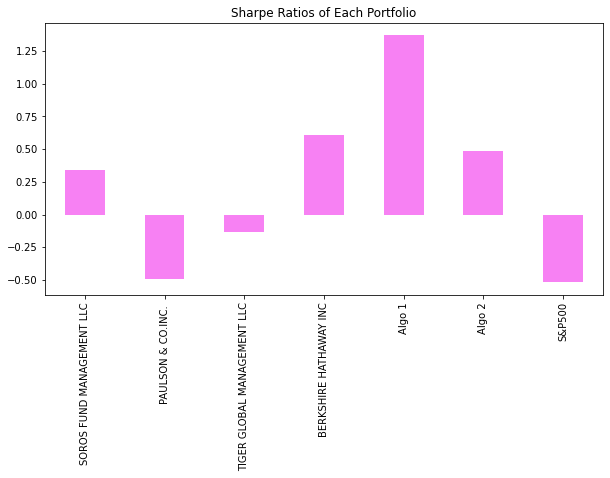

In [41]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar",figsize=(10, 5), title="Sharpe Ratios of Each Portfolio", color='#F781F3')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

The algoritmic strategies outperformed the market (S&P 500) and most of the "Whale" investors' portfolios.

---

# Create Custom Portfolio

In this section, I built a custom portfolio of stocks, calculated the returns, and compared the results to the Whale/Algo Portfolios and the S&P 500 by:

1. Choosing 3-5 custom stocks with at last 1 year's worth of historic prices and creating a DataFrame of the closing prices and dates for each stock.
2. Calculating the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Joining the custom portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-running the performance and risk analysis with the custom portfolio to see how it compares to the others
5. Including correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this Custom Portfolio, we are using the data from the following three companies listed in the S&P 500 index:

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [42]:
# Reading data from Apple
apple_closing_prices = pd.read_csv('aapl_historical.csv',  index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
# Delete 'Symbol' column
apple_closing_prices = apple_closing_prices.drop(columns=["Symbol"])
# Rename Column
apple_closing_prices = apple_closing_prices.rename(columns={"NOCP": "Apple"})
apple_closing_prices.head()

#apple_closing_prices

,Apple
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75


In [43]:
# Reading data from 2nd stock
google_closing_prices = pd.read_csv('goog_historical.csv',  index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
google_closing_prices = google_closing_prices.drop(columns=["Symbol"])

google_closing_prices = google_closing_prices.rename(columns={"NOCP": "Google"})
google_closing_prices.head()

,Google
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40


In [44]:
# Reading data from 3rd stock
costco_closing_prices = pd.read_csv('cost_historical.csv',  index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
costco_closing_prices = costco_closing_prices.drop(columns=["Symbol"])

costco_closing_prices = costco_closing_prices.rename(columns={"NOCP": "Costco"})
costco_closing_prices.head()

,Costco
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62


In [45]:
# Combine all stocks in a single DataFrame
custom_portfolio = pd.concat([google_closing_prices, apple_closing_prices, costco_closing_prices], axis='columns', join='inner')
custom_portfolio

,Google,Apple,Costco
Trade DATE,,,
2019-05-09,1162.38,200.72,243.47
2019-05-08,1166.27,202.90,241.34
2019-05-07,1174.10,202.86,240.18
2019-05-06,1189.39,208.48,244.23
2019-05-03,1185.40,211.75,244.62
...,...,...,...
2018-05-17,1078.59,186.99,199.60
2018-05-16,1081.77,188.18,198.71
2018-05-15,1079.23,186.44,195.48


In [46]:
# Calculate daily returns
custom_portfolio_returns = custom_portfolio.pct_change()
custom_portfolio_returns

,Google,Apple,Costco
Trade DATE,,,
2019-05-09,NaN,NaN,NaN
2019-05-08,0.003347,0.010861,-0.008749
2019-05-07,0.006714,-0.000197,-0.004806
2019-05-06,0.013023,0.027704,0.016862
2019-05-03,-0.003355,0.015685,0.001597
...,...,...,...
2018-05-17,0.011469,0.003650,0.003217
2018-05-16,0.002948,0.006364,-0.004459
2018-05-15,-0.002348,-0.009246,-0.016255


In [50]:
# Search for and drop NAs
custom_portfolio_returns.isnull().mean() * 100
custom_portfolio_returns.isnull().sum()

Google    0
Apple     0
Costco    0
dtype: int64

In [51]:
custom_portfolio_returns = custom_portfolio_returns.dropna()

In [52]:
# Validate no more missing values
custom_portfolio_returns.isnull().sum()

Google    0
Apple     0
Costco    0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [53]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_returns = custom_portfolio_returns.dot(weights)

# Display sample data
weighted_returns

Trade DATE
2019-05-08    0.001820
2019-05-07    0.000570
2019-05-06    0.019196
2019-05-03    0.004642
2019-05-02   -0.013131
                ...   
2018-05-17    0.006112
2018-05-16    0.001618
2018-05-15   -0.009283
2018-05-14    0.010216
2018-05-11   -0.000012
Length: 249, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [54]:
# Join your returns DataFrame to the original returns DataFrame
compare_all_portfolios = pd.concat([weighted_returns, all_returns], axis="columns", join="inner")

compare_all_portfolios = compare_all_portfolios.rename(columns={0: "My_Portfolio"})
compare_all_portfolios

,My_Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
2019-04-22,-0.011812,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,-0.008764
2019-04-18,-0.001148,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011
2019-04-17,-0.001541,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577
2019-04-16,-0.009149,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-15,-0.000326,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
...,...,...,...,...,...,...,...,...
2018-05-17,0.006112,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639
2018-05-16,0.001618,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857
2018-05-15,-0.009283,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044
2018-05-14,0.010216,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889


In [55]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
compare_all_portfolios.isnull().mean() * 100
compare_all_portfolios.isnull().sum()

My_Portfolio                   0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P500                         0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [56]:
# Calculate the daily standard deviations of all portfolios
compare_all_portfolios_std = compare_all_portfolios.std()
compare_all_portfolios_std

My_Portfolio                   0.013426
SOROS FUND MANAGEMENT LLC      0.009234
PAULSON & CO.INC.              0.007350
TIGER GLOBAL MANAGEMENT LLC    0.014642
BERKSHIRE HATHAWAY INC         0.015548
Algo 1                         0.008419
Algo 2                         0.008769
S&P500                         0.009584
dtype: float64

In [78]:
compare_all_portfolios_std = compare_all_portfolios_std.sort_values(ascending=False)
compare_all_portfolios_std

BERKSHIRE HATHAWAY INC         0.015548
TIGER GLOBAL MANAGEMENT LLC    0.014642
My_Portfolio                   0.013426
S&P500                         0.009584
SOROS FUND MANAGEMENT LLC      0.009234
Algo 2                         0.008769
Algo 1                         0.008419
PAULSON & CO.INC.              0.007350
dtype: float64

In [57]:
# Calculate the annualized `std` (252 trading days)
annualized_std_all_portfolios = compare_all_portfolios_std * np.sqrt(252)
annualized_std_all_portfolios.head()

My_Portfolio                   0.213137
SOROS FUND MANAGEMENT LLC      0.146589
PAULSON & CO.INC.              0.116683
TIGER GLOBAL MANAGEMENT LLC    0.232434
BERKSHIRE HATHAWAY INC         0.246819
dtype: float64

### Calculate and plot rolling `std` with 21-day window

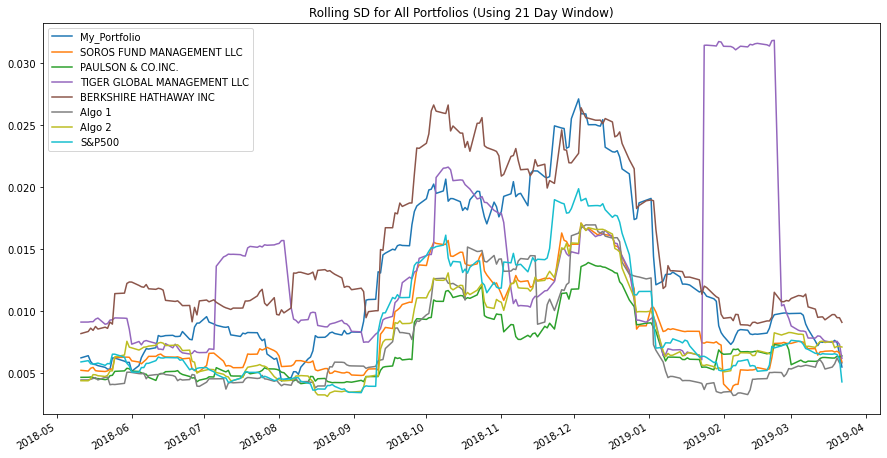

In [58]:
# Calculate rolling standard deviation
compare_all_portfolios.rolling(window=21).std().plot(figsize=(15,8),
                                          title="Rolling SD for All Portfolios (Using 21 Day Window)", colormap="tab10")
# Plot rolling standard deviation


### Calculate and plot the correlation

In [59]:
# Calculate the correlation
compare_all_portfolios.corr()

,My_Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
My_Portfolio,1.000000,0.061503,0.025680,0.036047,0.006755,0.073296,0.039910,0.869976
SOROS FUND MANAGEMENT LLC,0.061503,1.000000,0.791031,0.476938,0.816190,0.336890,0.861989,-0.028091
PAULSON & CO.INC.,0.025680,0.791031,1.000000,0.484917,0.650132,0.360668,0.783856,-0.059893
TIGER GLOBAL MANAGEMENT LLC,0.036047,0.476938,0.484917,1.000000,0.323931,0.113568,0.408381,0.005812
BERKSHIRE HATHAWAY INC,0.006755,0.816190,0.650132,0.323931,1.000000,0.326025,0.781894,-0.038751
Algo 1,0.073296,0.336890,0.360668,0.113568,0.326025,1.000000,0.364440,-0.054454
Algo 2,0.039910,0.861989,0.783856,0.408381,0.781894,0.364440,1.000000,-0.042549
S&P500,0.869976,-0.028091,-0.059893,0.005812,-0.038751,-0.054454,-0.042549,1.000000


In [60]:
mask = np.zeros_like(compare_all_portfolios.corr()) 
triangle_indices = np.triu_indices_from(mask) 
mask[triangle_indices] = True
#mask 

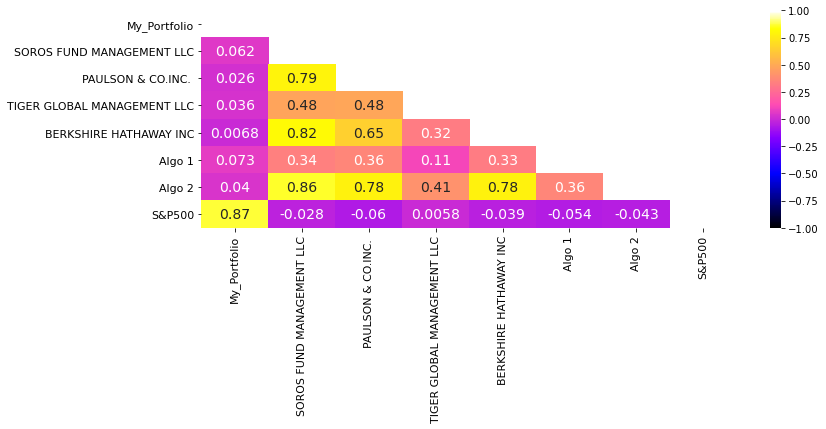

In [61]:
# Correlation Heatmap
plt.figure(figsize =(12,4))
sns.heatmap(compare_all_portfolios.corr(), vmin=-1, vmax=1, mask=mask, annot=True, annot_kws={"size":14}, cmap='gnuplot2')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [62]:
# Using the Custom Portfolio to calculate and plot the 60-day rolling beta between it and the S&P 500
new_covariance = compare_all_portfolios['My_Portfolio'].rolling(window = 60).cov(compare_all_portfolios['S&P500'])

In [63]:
# Calculate variance of S&P 500
new_variance = compare_all_portfolios['S&P500'].rolling(window=60).var()

In [64]:
# Computing beta for the custom portfolio compared to the S&P 500
new_sixty_day_rolling_beta = new_covariance / new_variance
new_sixty_day_rolling_beta

2019-04-22         NaN
2019-04-18         NaN
2019-04-17         NaN
2019-04-16         NaN
2019-04-15         NaN
                ...   
2018-05-17    0.956755
2018-05-16    0.965939
2018-05-15    0.990122
2018-05-14    1.002274
2018-05-11    1.002870
Length: 237, dtype: float64

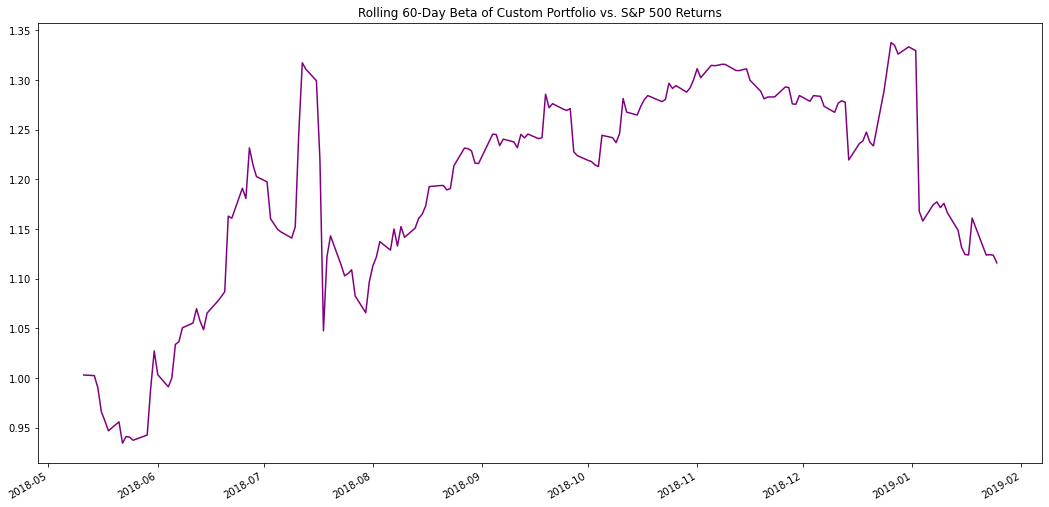

In [77]:
# Plot beta trend
new_sixty_day_rolling_beta.plot(figsize=(18, 9), title='Rolling 60-Day Beta of Custom Portfolio vs. S&P 500 Returns', color='purple')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [72]:
# Calculate Annualzied Sharpe Ratios
new_sharpe_ratios = (compare_all_portfolios.mean() * (252)) / (compare_all_portfolios.std() * np.sqrt(252))
new_sharpe_ratios

My_Portfolio                  -0.613547
SOROS FUND MANAGEMENT LLC      0.344766
PAULSON & CO.INC.              0.236041
TIGER GLOBAL MANAGEMENT LLC   -1.052249
BERKSHIRE HATHAWAY INC         0.085005
Algo 1                         1.999866
Algo 2                         0.009467
S&P500                        -0.432942
dtype: float64

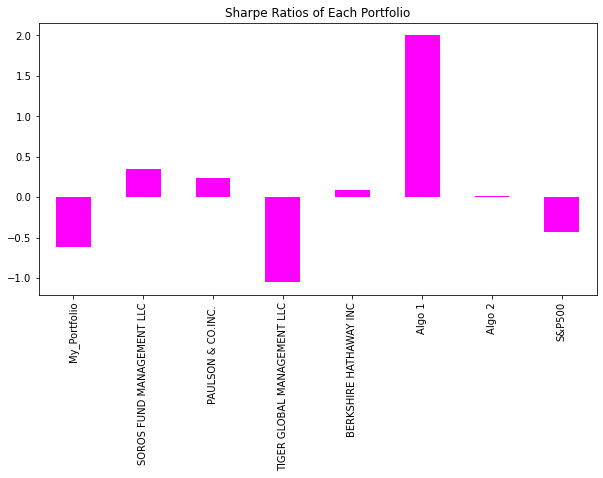

In [73]:
# Visualize the sharpe ratios as a bar plot
new_sharpe_ratios.plot(kind="bar",figsize=(10, 5), title="Sharpe Ratios of Each Portfolio", color='#FF00FF')

### How does your portfolio do?

Based on the Standard Deviations of all of our returns, our custom portfolio in comparison to the others was riskier than all but Berkshire Hathaway Inc. and Tiger Global Management LLC.

Looking at our Sharpe Ratio, we can see that the custom Portfolio has better risk-adjusted returns than only one of the other "whale" inverstor's portfolios (Tiger Global Management LLC). The higher a fund's Sharpe ratio, the better a fund's returns have been relative to the risk it has taken on.

Beta tells us how much the portfolio moves relative to the total market. In the chart above, titled 'Rolling 60-Day Beta of Custom Portfolio vs. S&P 500 Returns', our custom portfolio's price is more volatile than the market (S&P 500) and moves in the same direction.